In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [74]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

# Metadata

 - <i><b>encounter_id</i></b> - Unique identifier of the encounter
 - <i><b>country</i></b> - country
 - <i><b>patient_id</i></b> - Identifier of the patient
 - <i><b>race</i></b> - Patient’s race
 - <i><b>gender</i></b> - Patient’s gender
 - <i><b>age</i></b> - Patient’s age bracket
 - <i><b>weight</i></b> - Patient’s weight
 - <i><b>payer_code</i></b> - Code of the health insurance provider (if there is one)
 - <i><b>outpatient_visits_in_previous_year</i></b> - Number of outpatient visits (visits made with the intention of leaving on the same day) the patient made to the hospital in the year preceding the encounter
 - <i><b>emergency_visits_in_previous_year</i></b> - Number of emergency visits the patient made to the hospital in the year preceding the encounter
 - <i><b>inpatient_visits_in_previous_year</i></b> - Number of inpatient visits (visits with the intention to stay overnight) the patient made to the hospital in the year preceding the encounter
 - <i><b>admission_type</i></b> - Type of admission of the patient (e.g. Emergency, Urgent,etc…)
 - <i><b>medical_specialty</i></b> - Medical specialty on which the patient was admitted
 - <i><b>average_pulse_bpm</i></b> - Average pulse of the patient during their stay in the hospital in beats per minute
 - <i><b>discharge_disposition</i></b> - Destination given to the patient after being discharged
 - <i><b>admission_source</i></b> - Source of the patient before being admitted in the current encounter
 - <i><b>length_of_stay_in_hospital</i></b> - Number of days between admission and discharge
 - <i><b>number_lab_tests</i></b> - Number of lab tests performed during the encounter
 - <i><b>non_lab_procedures</i></b> - Number of non-lab procedures performed during the encounter
 - <i><b>number_of_medications</i></b> - Number of distinct types of medication administered during the encounter
 - <i><b>primary_diagnosis</i></b> - Primary diagnosis (coded as first three digits of ICD9)
 - <i><b>secondary_diagnosis</i></b> - Secondary diagnosis (first three digits of ICD9)
 - <i><b>additional_diagnosis</i></b> - Additional secondary diagnosis (first three digits of ICD9)
 - <i><b>number_diagnoses</i></b> - Number of diagnosis entered to the system
 - <i><b>glucose_test_result</i></b> - Range  of the glucose test results or if the test was not taken. Values: ">200", ">300", "normal", and "none" if not measured
 - <i><b>a1c_test_results</i></b> - Range of the A1C test results or if the test was not taken. Values: ">8" if greater than 8%, ">7" if greater than 7% but less than 8%, "normal" if less than 7% and "none" if not measured
 - <i><b>change_in_meds_during_hospitalization</i></b> - Indicates if there was a change in diabetic medications (dosage or generic name). Values: "change" and "no change"
 - <i><b>perscribed_diabetes_meds</i></b> - Yes if patient has diabetes medication perscription. No otherwise.
 - <i><b>medication</i></b>- List containing all generic names for the medications perscribed to the patient during the encounter. Empty if no medication was perscribed
 - <i><b>readmitted_binary</i></b> - Binary Target: Yes if patient was readmitted in less than 30 days. No otherwise.
 - <i><b>readmitted_multiclass</i></b> - Multiclass Target: "<30 days" if patient was readmitted in less than 30 days after being discharged. ">30 days" if patient was readmitted to the hospital but only after more than 30 days after the current discharged. No otherwise

# Data Preprocessing

In [75]:
# We can see question marks that represent missing values
# So before we actually handle missing values, we will transform all missing values into NaN types
data_train

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,660160,USA,24531381,AfricanAmerican,Female,[80-90),?,MC,0,1,...,786,250,9,NaN,>7,Ch,Yes,"['metformin', 'glyburide', 'insulin']",No,No
71232,826429,USA,4663818,AfricanAmerican,Female,[70-80),?,?,0,0,...,197,V66,6,NaN,>7,Ch,Yes,"['metformin', 'glyburide']",No,No
71233,332030,USA,23397147,Caucasian,Female,[60-70),?,?,0,2,...,491,276,9,>300,NaN,Ch,Yes,"['glyburide', 'insulin']",Yes,<30 days
71234,757560,USA,52161750,Caucasian,Male,[60-70),?,BC,0,0,...,157,250.8,5,NaN,NaN,Ch,Yes,"['glyburide', 'insulin']",No,No


In [76]:
data_train.replace('?', np.nan, inplace = True)
data_test.replace('?', np.nan, inplace = True)
data_train

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),NaN,NaN,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),NaN,NaN,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),NaN,NaN,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),NaN,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),NaN,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,660160,USA,24531381,AfricanAmerican,Female,[80-90),NaN,MC,0,1,...,786,250,9,NaN,>7,Ch,Yes,"['metformin', 'glyburide', 'insulin']",No,No
71232,826429,USA,4663818,AfricanAmerican,Female,[70-80),NaN,NaN,0,0,...,197,V66,6,NaN,>7,Ch,Yes,"['metformin', 'glyburide']",No,No
71233,332030,USA,23397147,Caucasian,Female,[60-70),NaN,NaN,0,2,...,491,276,9,>300,NaN,Ch,Yes,"['glyburide', 'insulin']",Yes,<30 days
71234,757560,USA,52161750,Caucasian,Male,[60-70),NaN,BC,0,0,...,157,250.8,5,NaN,NaN,Ch,Yes,"['glyburide', 'insulin']",No,No


In [77]:
# Now we can see how many missing values we have for each feature
data_train.isna().sum()

encounter_id                                 0
country                                      0
patient_id                                   0
race                                      5070
gender                                       0
age                                       3557
weight                                   68990
payer_code                               28201
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3706
medical_specialty                        34922
average_pulse_bpm                            0
discharge_disposition                     2590
admission_source                          4718
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                           16
secondary_dia

In [78]:
# Transforming target variable into binary
data_train['readmitted_binary'] = data_train['readmitted_binary'].replace({'Yes': 1, 'No': 0}).astype(int)

# We can already check that our data is unbalanced
data_train['readmitted_binary'].value_counts()

0    63286
1     7950
Name: readmitted_binary, dtype: int64

In [79]:
# The country has no missing values and only one value so it is an irrelevant variable
data_train['country'].value_counts()

data_train.drop(columns = 'country', inplace = True)
data_test.drop(columns = 'country', inplace = True)

data_train

,encounter_id,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,70110,Caucasian,Female,[70-80),NaN,NaN,0,0,2,...,276,466,8,NaN,NaN,No,No,[],0,>30 days
1,426224,29775006,AfricanAmerican,Male,[50-60),NaN,NaN,0,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],0,No
2,634063,80729253,Caucasian,Female,[60-70),NaN,NaN,0,0,1,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",0,No
3,890610,2919042,AfricanAmerican,Male,[60-70),NaN,MC,0,0,1,...,562,455,5,NaN,NaN,No,No,[],0,No
4,654194,84871971,Caucasian,Female,[70-80),NaN,HM,1,0,0,...,599,428,9,NaN,NaN,No,No,[],0,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,660160,24531381,AfricanAmerican,Female,[80-90),NaN,MC,0,1,0,...,786,250,9,NaN,>7,Ch,Yes,"['metformin', 'glyburide', 'insulin']",0,No
71232,826429,4663818,AfricanAmerican,Female,[70-80),NaN,NaN,0,0,0,...,197,V66,6,NaN,>7,Ch,Yes,"['metformin', 'glyburide']",0,No
71233,332030,23397147,Caucasian,Female,[60-70),NaN,NaN,0,2,2,...,491,276,9,>300,NaN,Ch,Yes,"['glyburide', 'insulin']",1,<30 days
71234,757560,52161750,Caucasian,Male,[60-70),NaN,BC,0,0,2,...,157,250.8,5,NaN,NaN,Ch,Yes,"['glyburide', 'insulin']",0,No


In [80]:
data_train = data_train.sort_values(['patient_id', 'encounter_id'])
data_test = data_test.sort_values(['patient_id', 'encounter_id'])

data_train['race'] = data_train.groupby('patient_id')['race'].fillna(method = 'ffill')
data_test['race'] = data_test.groupby('patient_id')['race'].fillna(method = 'ffill')

In [81]:
data_train['race'] = data_train.groupby('patient_id')['race'].fillna(method='bfill')
data_test['race'] = data_test.groupby('patient_id')['race'].fillna(method='bfill')

In [82]:
data_train['race'].isna().sum()

3648

In [83]:
# Using One Hot Enconder for the race variable
encoder = OneHotEncoder(sparse_output = False)

encoder_race_train = encoder.fit_transform(data_train['race'].values.reshape(-1, 1))
encoder_race_test = encoder.transform(data_test['race'].values.reshape(-1, 1))

data_train = pd.concat([data_train, pd.DataFrame(encoder_race_train, columns=encoder.get_feature_names_out(['race']))], axis=1)
data_test = pd.concat([data_test, pd.DataFrame(encoder_race_test, columns = encoder.get_feature_names_out(['race']))], axis = 1)

data_train.drop(columns = 'race', inplace = True)
data_test.drop(columns = 'race', inplace = True)

data_train.columns

Index(['encounter_id', 'patient_id', 'gender', 'age', 'weight', 'payer_code',
       'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication', 'readmitted_binary', 'readmitted_multiclass',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'race_nan'],
      dtype='object')

In [84]:
# Check all gender values
data_train['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [85]:
# Transforming gender into a categorical variable
data_train['gender'] = data_train['gender'].replace({'Female': 1, 'Male': 0, 'Unknown/Invalid': np.nan}).astype(float)
data_test['gender'] = data_test['gender'].replace({'Female': 1, 'Male': 0, 'Unknown/Invalid': np.nan}).astype(float)

data_train['gender'].value_counts()

1.0    38228
0.0    33005
Name: gender, dtype: int64

In [86]:
data_train['gender'].isna().sum()

3

In [87]:
# These are the only 3 patients with the gender information missing
# After searching for patient id, we conclude that it is the first time these patients came to the hospital
# So we can't replace these missing values with the information from previous visits
data_train[pd.isna(data_train['gender'])]

,encounter_id,patient_id,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,...,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_nan
43834,978787,60524946,NaN,[60-70),NaN,CP,0,0,0,Emergency,...,No,[],0,No,0.0,0.0,1.0,0.0,0.0,0.0
7057,208080,78119847,NaN,[70-80),NaN,CP,0,0,0,Emergency,...,Yes,"['metformin', 'rosiglitazone']",0,No,0.0,0.0,1.0,0.0,0.0,0.0
64443,876217,100695042,NaN,[70-80),NaN,NaN,0,0,0,Elective,...,Yes,"['glipizide', 'pioglitazone']",0,No,1.0,0.0,0.0,0.0,0.0,0.0


In [88]:
#encoding age as label encoding with bigger number if the age is bigger
data_train['age'] = data_train['age'].replace({'[0-10)': 5,
                                           '[10-20)': 15,
                                           '[20-30)': 25,
                                           '[30-40)': 35,
                                           '[40-50)': 45,
                                           '[50-60)': 55,
                                           '[60-70)': 65,
                                           '[70-80)': 75,
                                           '[80-90)': 85,
                                           '[90-100)': 95})

data_test['age'] = data_test['age'].replace({'[0-10)': 5,
                                           '[10-20)': 15,
                                           '[20-30)': 25,
                                           '[30-40)': 35,
                                           '[40-50)': 45,
                                           '[50-60)': 55,
                                           '[60-70)': 65,
                                           '[70-80)': 75,
                                           '[80-90)': 85,
                                           '[90-100)': 95})

data_train

,encounter_id,patient_id,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,...,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_nan
4161,536851,135,1.0,55.0,NaN,NaN,0,0,0,Urgent,...,Yes,"['metformin', 'glyburide', 'insulin']",1,<30 days,0.0,0.0,1.0,0.0,0.0,0.0
29808,538318,135,1.0,55.0,NaN,NaN,0,0,1,Emergency,...,Yes,"['metformin', 'glyburide']",0,>30 days,0.0,0.0,1.0,0.0,0.0,0.0
63103,436596,729,1.0,85.0,NaN,MC,0,0,0,Emergency,...,Yes,['metformin'],0,No,0.0,0.0,1.0,0.0,0.0,0.0
48733,575961,774,1.0,NaN,NaN,NaN,0,0,0,Emergency,...,Yes,"['metformin', 'glyburide']",0,No,0.0,0.0,1.0,0.0,0.0,0.0
67885,265544,1152,1.0,55.0,NaN,NaN,0,0,1,Emergency,...,Yes,['insulin'],0,>30 days,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17371,243370,189349430,1.0,75.0,NaN,MC,0,0,0,Emergency,...,Yes,['glimepiride'],0,No,1.0,0.0,0.0,0.0,0.0,0.0
12488,256592,189351095,1.0,85.0,NaN,NaN,0,0,0,Emergency,...,No,[],0,No,0.0,0.0,1.0,0.0,0.0,0.0
47161,767657,189365864,0.0,65.0,NaN,HM,0,0,0,Emergency,...,Yes,['insulin'],0,No,0.0,0.0,1.0,0.0,0.0,0.0
42446,500696,189445127,1.0,85.0,NaN,NaN,0,0,0,Emergency,...,Yes,"['metformin', 'glipizide', 'rosiglitazone', 'i...",0,No,0.0,0.0,1.0,0.0,0.0,0.0


In [89]:
patients_age_missing = data_train[pd.isna(data_train['age'])]['patient_id']

In [90]:
# We will look for patient id to see if in previous encounters, the age information is filled
# We will use the forward fill in case the missing value is in last encounters
# And backward fill in case the missing value is in the first encounters

data_train['age'] =data_train.groupby('patient_id')['age'].fillna(method = 'ffill')
data_test['age'] = data_test.groupby('patient_id')['age'].fillna(method = 'ffill')

In [91]:
data_train['age'] = data_train.groupby('patient_id')['age'].fillna(method='bfill')
data_test['age'] = data_test.groupby('patient_id')['age'].fillna(method = 'bfill')

In [92]:
#for patient in patients_age_missing:
 #   print(data_train[data_train['patient_id'] == patient])

In [93]:
data_train['age'].isna().sum()

2217

In [94]:
#less than 5% of observation has weight measure
#so, we'll just replace it with binary variable indicating observation has weight value or not
data_train['weight'] = data_train['weight'].apply(lambda x: 0 if pd.isna(x) else 1)
data_test['weight'] = data_test['weight'].apply(lambda x: 0 if pd.isna(x) else 1)

data_train

,encounter_id,patient_id,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,...,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_nan
4161,536851,135,1.0,55.0,0,NaN,0,0,0,Urgent,...,Yes,"['metformin', 'glyburide', 'insulin']",1,<30 days,0.0,0.0,1.0,0.0,0.0,0.0
29808,538318,135,1.0,55.0,0,NaN,0,0,1,Emergency,...,Yes,"['metformin', 'glyburide']",0,>30 days,0.0,0.0,1.0,0.0,0.0,0.0
63103,436596,729,1.0,85.0,0,MC,0,0,0,Emergency,...,Yes,['metformin'],0,No,0.0,0.0,1.0,0.0,0.0,0.0
48733,575961,774,1.0,NaN,0,NaN,0,0,0,Emergency,...,Yes,"['metformin', 'glyburide']",0,No,0.0,0.0,1.0,0.0,0.0,0.0
67885,265544,1152,1.0,55.0,0,NaN,0,0,1,Emergency,...,Yes,['insulin'],0,>30 days,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17371,243370,189349430,1.0,75.0,0,MC,0,0,0,Emergency,...,Yes,['glimepiride'],0,No,1.0,0.0,0.0,0.0,0.0,0.0
12488,256592,189351095,1.0,85.0,0,NaN,0,0,0,Emergency,...,No,[],0,No,0.0,0.0,1.0,0.0,0.0,0.0
47161,767657,189365864,0.0,65.0,0,HM,0,0,0,Emergency,...,Yes,['insulin'],0,No,0.0,0.0,1.0,0.0,0.0,0.0
42446,500696,189445127,1.0,85.0,0,NaN,0,0,0,Emergency,...,Yes,"['metformin', 'glipizide', 'rosiglitazone', 'i...",0,No,0.0,0.0,1.0,0.0,0.0,0.0


### Glucose Test and A1C Test

In [95]:
data_train['glucose_test_result'].isna().sum()

67548

In [96]:
# Create a binary variable which is 0 if the glucose test was not performed and 1 if it was
data_train['glucose_test_performed'] = data_train['glucose_test_result'].apply(lambda x: 0 if pd.isna(x) else 1)
data_test['glucose_test_performed'] = data_test['glucose_test_result'].apply(lambda x: 0 if pd.isna(x) else 1)

data_train.columns

Index(['encounter_id', 'patient_id', 'gender', 'age', 'weight', 'payer_code',
       'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication', 'readmitted_binary', 'readmitted_multiclass',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'race_nan', 'glucose_test_performed'],
      dtype='object')

In [97]:
data_train['glucose_test_result'] = data_train['glucose_test_result'].apply(lambda x: 0 if pd.isna(x) else x)
data_test['glucose_test_result'] = data_test['glucose_test_result'].apply(lambda x: 0 if pd.isna(x) else x)

data_train['glucose_test_result'].value_counts()

0       67548
Norm     1806
>200     1055
>300      827
Name: glucose_test_result, dtype: int64

In [187]:
# The percentage of people who have been readmitted and had the glucose test performed
# And the percentage of people who have not been readmitted and also had the test performed is practically the same
# This may indicate that having this test performed or not does not say much about whether the person will be or not readmitted ???
data_train.groupby('glucose_test_performed')['readmitted_binary'].value_counts(normalize = True).unstack()

readmitted_binary,0,1
glucose_test_performed,,
0,0.889353,0.110647
1,0.870933,0.129067


In [186]:
data_train.groupby('glucose_test_result')['readmitted_binary'].value_counts(normalize = True).unstack()

readmitted_binary,0,1
glucose_test_result,,
0,0.889353,0.110647
>200,0.869194,0.130806
>300,0.857316,0.142684
Norm,0.878184,0.121816


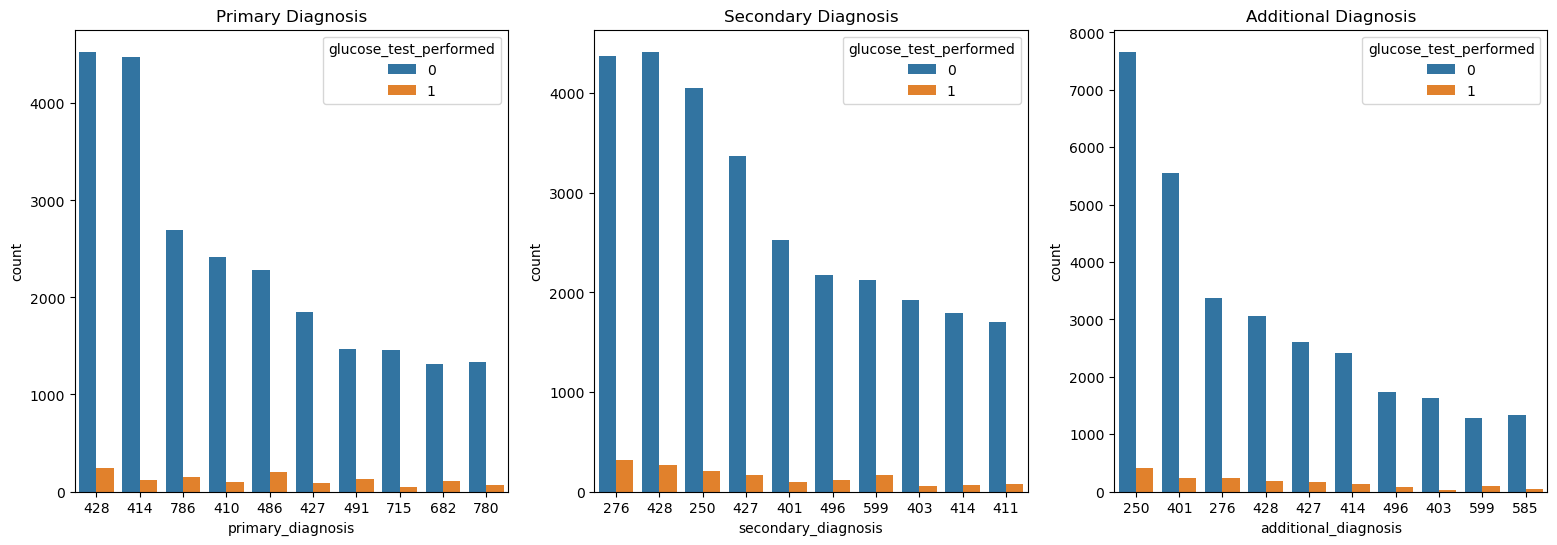

In [207]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(19, 6))

top_diagnoses_primary = data_train['primary_diagnosis'].value_counts().nlargest(10).index
top_diagnoses_secondary = data_train['secondary_diagnosis'].value_counts().nlargest(10).index
top_diagnoses_additional = data_train['additional_diagnosis'].value_counts().nlargest(10).index

filtered_data_primary = data_train[data_train['primary_diagnosis'].isin(top_diagnoses_primary)]
filtered_data_secondary = data_train[data_train['secondary_diagnosis'].isin(top_diagnoses_secondary)]
filtered_data_additional = data_train[data_train['additional_diagnosis'].isin(top_diagnoses_additional)]

order1 = (filtered_data_primary.groupby('primary_diagnosis')['glucose_test_performed']
    .value_counts().unstack().sum(axis=1).sort_values(ascending=False).index)

order2 = (filtered_data_secondary.groupby('secondary_diagnosis')['glucose_test_performed']
    .value_counts().unstack().sum(axis=1).sort_values(ascending=False).index)

order3 = (filtered_data_additional.groupby('additional_diagnosis')['glucose_test_performed']
    .value_counts().unstack().sum(axis=1).sort_values(ascending=False).index)

sns.countplot(x='primary_diagnosis', hue='glucose_test_performed', data=filtered_data_primary, ax = axis1, order = order1)
sns.countplot(x='secondary_diagnosis', hue='glucose_test_performed', data=filtered_data_secondary, ax = axis2, order = order2)
sns.countplot(x='additional_diagnosis', hue='glucose_test_performed', data=filtered_data_additional, ax = axis3, order = order3)

axis1.set_title('Primary Diagnosis')
axis2.set_title('Secondary Diagnosis')
axis3.set_title('Additional Diagnosis')


plt.show()

In [128]:
data_train.groupby('primary_diagnosis')['glucose_test_performed'].value_counts().unstack().sort_values(by = 1, ascending = False)

glucose_test_performed,0,1
primary_diagnosis,,
428,4531.0,245.0
486,2283.0,205.0
786,2694.0,152.0
491,1466.0,128.0
414,4479.0,117.0
...,...,...
V45,5.0,NaN
V51,1.0,NaN
V53,34.0,NaN


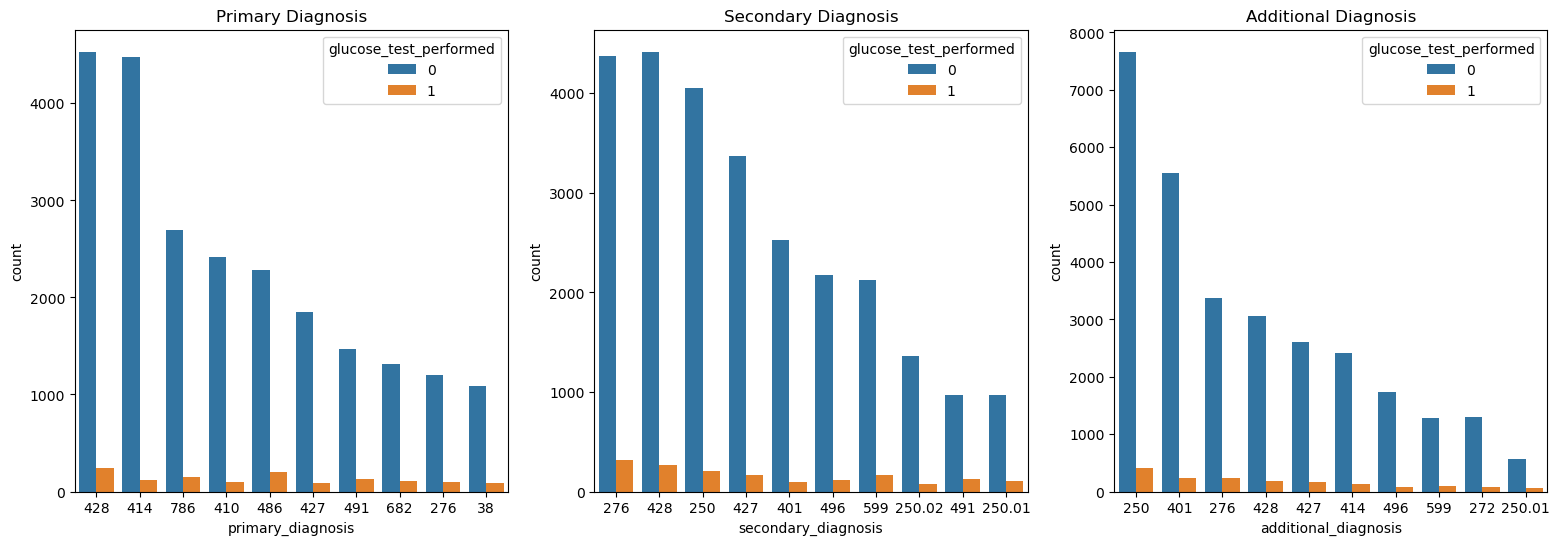

In [208]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(19, 6))

top_diagnoses_primary = data_train.groupby('primary_diagnosis')['glucose_test_performed'].value_counts().unstack().sort_values(by=1, ascending=False).head(10).index
top_diagnoses_secondary = data_train.groupby('secondary_diagnosis')['glucose_test_performed'].value_counts().unstack().sort_values(by=1, ascending=False).head(10).index
top_diagnoses_additional = data_train.groupby('additional_diagnosis')['glucose_test_performed'].value_counts().unstack().sort_values(by=1, ascending=False).head(10).index

filtered_data_primary = data_train[data_train['primary_diagnosis'].isin(top_diagnoses_primary)]
filtered_data_secondary = data_train[data_train['secondary_diagnosis'].isin(top_diagnoses_secondary)]
filtered_data_additional = data_train[data_train['additional_diagnosis'].isin(top_diagnoses_additional)]

order1 = (filtered_data_primary.groupby('primary_diagnosis')['glucose_test_performed']
    .value_counts().unstack().sum(axis=1).sort_values(ascending=False).index)

order2 = (filtered_data_secondary.groupby('secondary_diagnosis')['glucose_test_performed']
    .value_counts().unstack().sum(axis=1).sort_values(ascending=False).index)

order3 = (filtered_data_additional.groupby('additional_diagnosis')['glucose_test_performed']
    .value_counts().unstack().sum(axis=1).sort_values(ascending=False).index)

sns.countplot(x='primary_diagnosis', hue='glucose_test_performed', data=filtered_data_primary, ax = axis1, order = order1)
sns.countplot(x='secondary_diagnosis', hue='glucose_test_performed', data=filtered_data_secondary, ax = axis2, order = order2)
sns.countplot(x='additional_diagnosis', hue='glucose_test_performed', data=filtered_data_additional, ax = axis3,order = order3)

axis1.set_title('Primary Diagnosis')
axis2.set_title('Secondary Diagnosis')
axis3.set_title('Additional Diagnosis')


plt.show()

In [145]:
data_train.groupby('admission_type')['glucose_test_performed'].value_counts().unstack()

glucose_test_performed,0,1
admission_type,,
Elective,13195.0,16.0
Emergency,37184.0,558.0
Newborn,6.0,NaN
Not Available,1403.0,1917.0
Not Mapped,214.0,NaN
Trauma Center,13.0,NaN
Urgent,12866.0,158.0


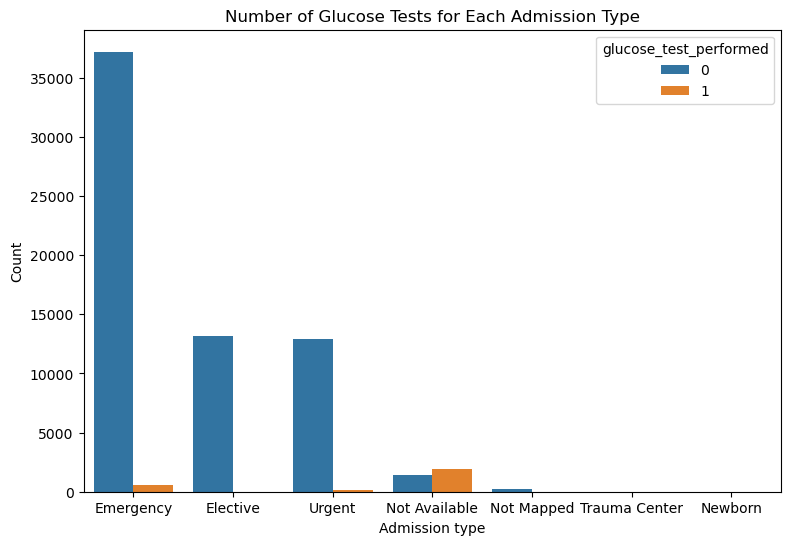

In [205]:
plt.figure(figsize=(9, 6))

order = data_train.groupby('admission_type')['glucose_test_performed'].value_counts().unstack().sum(axis=1).sort_values(ascending=False).index

sns.countplot(x='admission_type', hue='glucose_test_performed', data=data_train, order = order)

plt.xlabel('Admission type')
plt.ylabel('Count')
plt.title('Number of Glucose Tests for Each Admission Type')

plt.show()

In [149]:
data_train.groupby('medical_specialty')['glucose_test_performed'].value_counts().unstack().sort_values(by = 1, ascending = False).head(10)

glucose_test_performed,0,1
medical_specialty,,
Family/GeneralPractice,4524.0,693.0
InternalMedicine,9752.0,540.0
Surgery-General,1909.0,235.0
Cardiology,3575.0,141.0
Orthopedics-Reconstructive,756.0,111.0
Hematology/Oncology,71.0,82.0
Nephrology,1066.0,70.0
Psychiatry,534.0,64.0
Urology,453.0,25.0


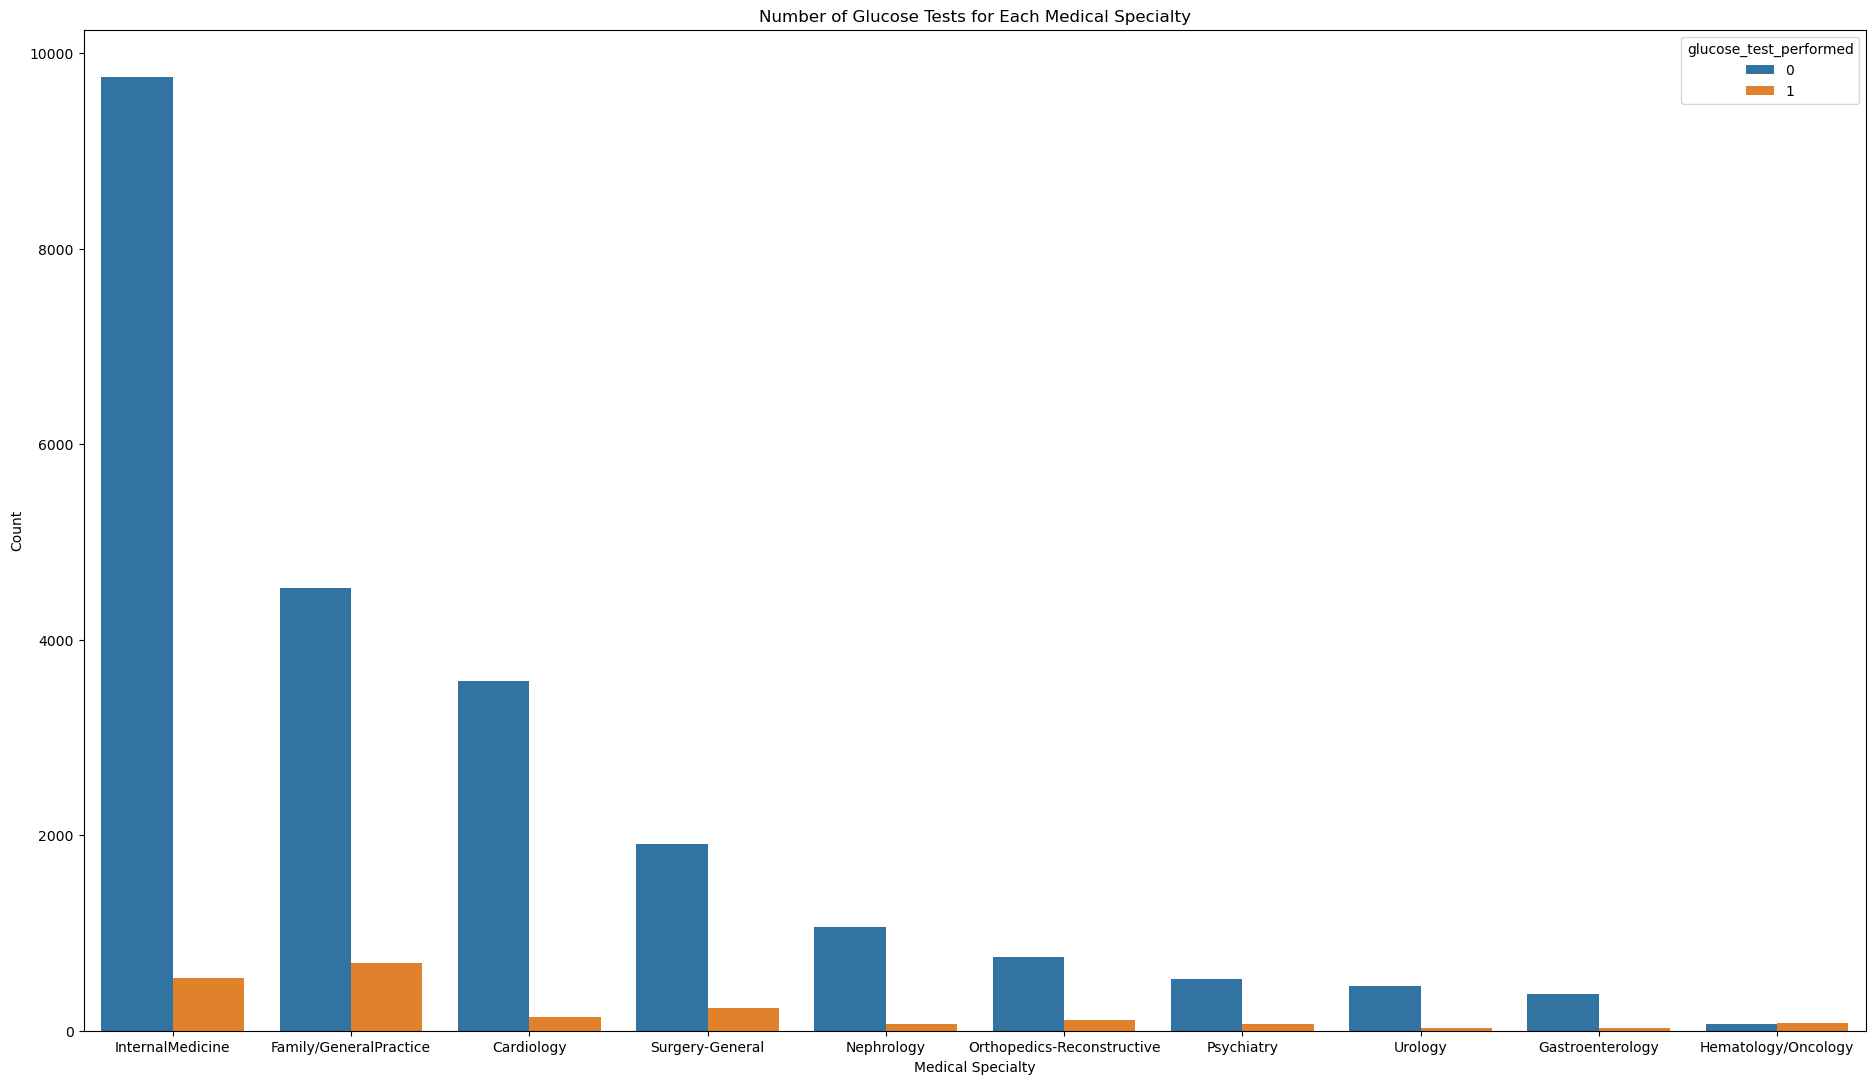

In [211]:
plt.figure(figsize=(23, 13))

top_medical_specialty = data_train.groupby('medical_specialty')['glucose_test_performed'].value_counts().unstack().sort_values(by = 1, ascending = False).head(10).index

data_filtered = data_train[data_train['medical_specialty'].isin(top_medical_specialty)]

order = (data_filtered.groupby('medical_specialty')['glucose_test_performed']
    .value_counts().unstack().sum(axis=1).sort_values(ascending=False).index)

sns.countplot(x='medical_specialty', hue='glucose_test_performed', data=data_filtered, order = order)

plt.xlabel('Medical Specialty')
plt.ylabel('Count')
plt.title('Number of Glucose Tests for Each Medical Specialty')

plt.show()

In [175]:
data_train['a1c_test_result'].isna().sum()

59320

In [176]:
# Create a binary variable which is 0 if the glucose test was not performed and 1 if it was
data_train['a1c_test_performed'] = data_train['a1c_test_result'].apply(lambda x: 0 if pd.isna(x) else 1)
data_test['a1c_test_performed'] = data_test['a1c_test_result'].apply(lambda x: 0 if pd.isna(x) else 1)

data_train.columns

Index(['encounter_id', 'patient_id', 'gender', 'age', 'weight', 'payer_code',
       'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication', 'readmitted_binary', 'readmitted_multiclass',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'race_nan', 'glucose_test_performed',
       'a1c_test_performed'],
      dtype='object')

In [177]:
data_train['a1c_test_result'] = data_train['a1c_test_result'].apply(lambda x: 0 if pd.isna(x) else x)
data_test['a1c_test_result'] = data_test['a1c_test_result'].apply(lambda x: 0 if pd.isna(x) else x)

data_train['a1c_test_result'].value_counts()

0       59320
>8       5705
Norm     3503
>7       2708
Name: a1c_test_result, dtype: int64

In [188]:
# The percentage of people who have been readmitted and had the glucose test performed
# And the percentage of people who have not been readmitted and also had the test performed is practically the same
# This may indicate that having this test performed or not does not say much about whether the person will be or not readmitted ???
data_train.groupby('a1c_test_performed')['readmitted_binary'].value_counts(normalize = True).unstack()

readmitted_binary,0,1
a1c_test_performed,,
0,0.885772,0.114228
1,0.901477,0.098523


In [189]:
data_train.groupby('a1c_test_result')['readmitted_binary'].value_counts(normalize = True).unstack()

readmitted_binary,0,1
a1c_test_result,,
0,0.885772,0.114228
>7,0.898449,0.101551
>8,0.903769,0.096231
Norm,0.900086,0.099914


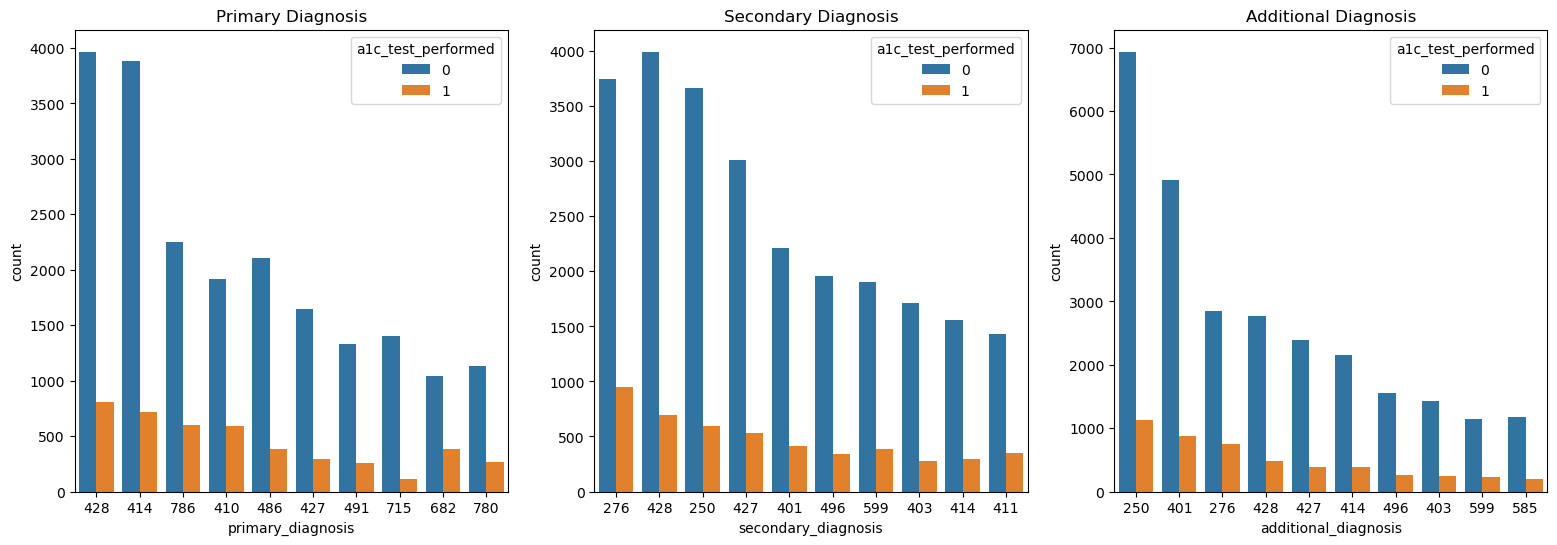

In [212]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(19, 6))

top_diagnoses_primary = data_train['primary_diagnosis'].value_counts().nlargest(10).index
top_diagnoses_secondary = data_train['secondary_diagnosis'].value_counts().nlargest(10).index
top_diagnoses_additional = data_train['additional_diagnosis'].value_counts().nlargest(10).index

filtered_data_primary = data_train[data_train['primary_diagnosis'].isin(top_diagnoses_primary)]
filtered_data_secondary = data_train[data_train['secondary_diagnosis'].isin(top_diagnoses_secondary)]
filtered_data_additional = data_train[data_train['additional_diagnosis'].isin(top_diagnoses_additional)]

order1 = (filtered_data_primary.groupby('primary_diagnosis')['a1c_test_performed']
    .value_counts().unstack().sum(axis=1).sort_values(ascending=False).index)

order2 = (filtered_data_secondary.groupby('secondary_diagnosis')['a1c_test_performed']
    .value_counts().unstack().sum(axis=1).sort_values(ascending=False).index)

order3 = (filtered_data_additional.groupby('additional_diagnosis')['a1c_test_performed']
    .value_counts().unstack().sum(axis=1).sort_values(ascending=False).index)

sns.countplot(x='primary_diagnosis', hue='a1c_test_performed', data=filtered_data_primary, ax = axis1, order = order1)
sns.countplot(x='secondary_diagnosis', hue='a1c_test_performed', data=filtered_data_secondary, ax = axis2, order = order2)
sns.countplot(x='additional_diagnosis', hue='a1c_test_performed', data=filtered_data_additional, ax = axis3, order = order3)

axis1.set_title('Primary Diagnosis')
axis2.set_title('Secondary Diagnosis')
axis3.set_title('Additional Diagnosis')


plt.show()

In [197]:
data_train.groupby('primary_diagnosis')['a1c_test_performed'].value_counts().unstack().sort_values(by = 1, ascending = False)

a1c_test_performed,0,1
primary_diagnosis,,
428,3966.0,810.0
414,3878.0,718.0
786,2246.0,600.0
410,1918.0,595.0
486,2104.0,384.0
...,...,...
V45,5.0,NaN
V51,1.0,NaN
V53,34.0,NaN


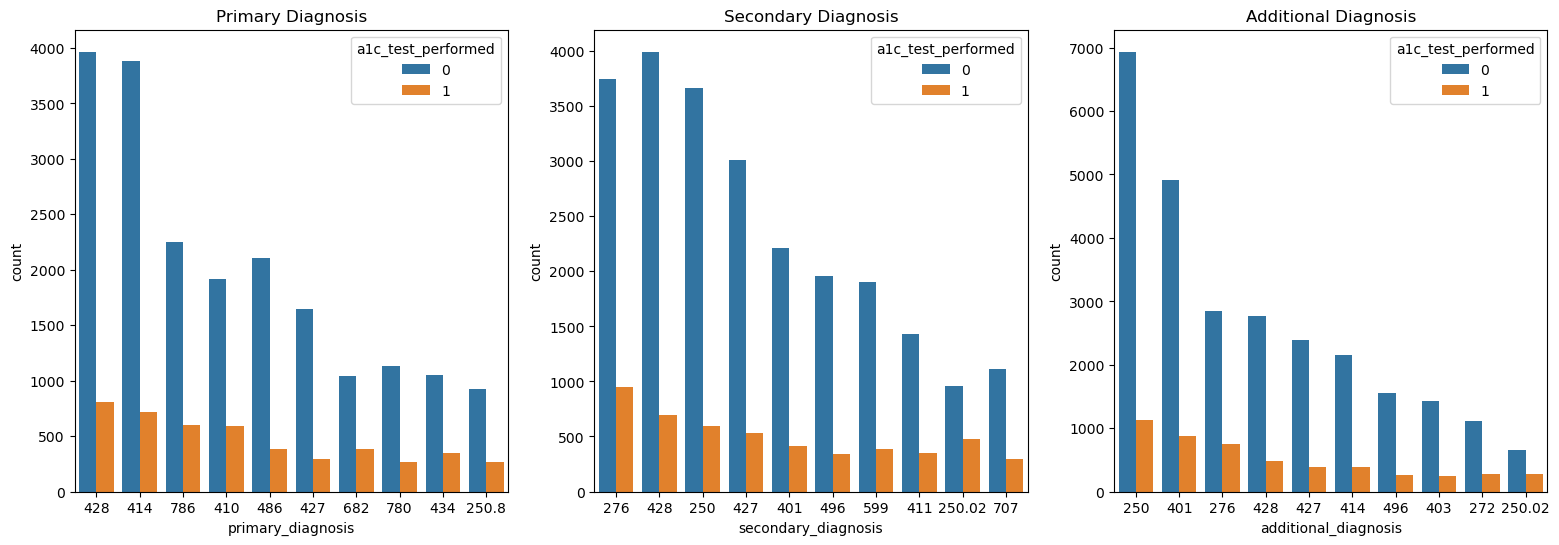

In [214]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(19, 6))

top_diagnoses_primary = data_train.groupby('primary_diagnosis')['a1c_test_performed'].value_counts().unstack().sort_values(by=1, ascending=False).head(10).index
top_diagnoses_secondary = data_train.groupby('secondary_diagnosis')['a1c_test_performed'].value_counts().unstack().sort_values(by=1, ascending=False).head(10).index
top_diagnoses_additional = data_train.groupby('additional_diagnosis')['a1c_test_performed'].value_counts().unstack().sort_values(by=1, ascending=False).head(10).index

filtered_data_primary = data_train[data_train['primary_diagnosis'].isin(top_diagnoses_primary)]
filtered_data_secondary = data_train[data_train['secondary_diagnosis'].isin(top_diagnoses_secondary)]
filtered_data_additional = data_train[data_train['additional_diagnosis'].isin(top_diagnoses_additional)]

order1 = (filtered_data_primary.groupby('primary_diagnosis')['a1c_test_performed']
    .value_counts().unstack().sum(axis=1).sort_values(ascending=False).index)

order2 = (filtered_data_secondary.groupby('secondary_diagnosis')['a1c_test_performed']
    .value_counts().unstack().sum(axis=1).sort_values(ascending=False).index)

order3 = (filtered_data_additional.groupby('additional_diagnosis')['a1c_test_performed']
    .value_counts().unstack().sum(axis=1).sort_values(ascending=False).index)

sns.countplot(x='primary_diagnosis', hue='a1c_test_performed', data=filtered_data_primary, ax = axis1, order = order1)
sns.countplot(x='secondary_diagnosis', hue='a1c_test_performed', data=filtered_data_secondary, ax = axis2, order = order2)
sns.countplot(x='additional_diagnosis', hue='a1c_test_performed', data=filtered_data_additional, ax = axis3, order = order3)

axis1.set_title('Primary Diagnosis')
axis2.set_title('Secondary Diagnosis')
axis3.set_title('Additional Diagnosis')


plt.show()

In [193]:
data_train.groupby('admission_type')['a1c_test_performed'].value_counts().unstack()

a1c_test_performed,0,1
admission_type,,
Elective,11845.0,1366.0
Emergency,30503.0,7239.0
Newborn,6.0,NaN
Not Available,3010.0,310.0
Not Mapped,180.0,34.0
Trauma Center,10.0,3.0
Urgent,10749.0,2275.0


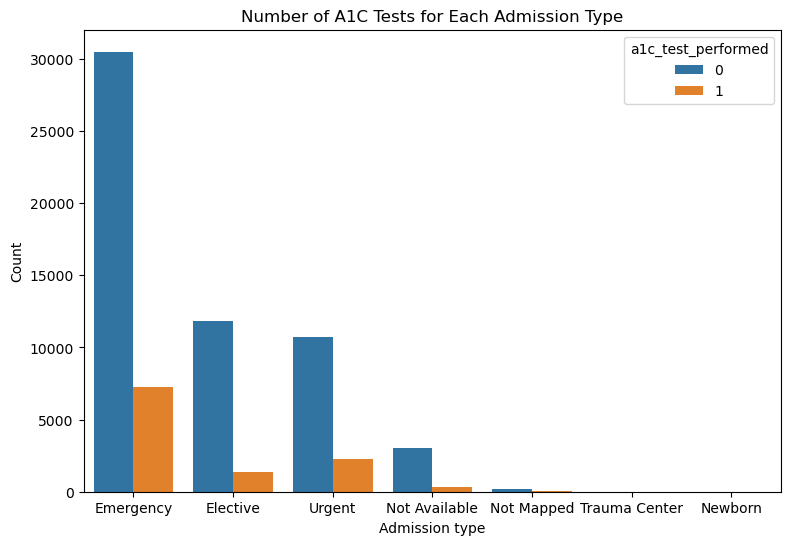

In [204]:
plt.figure(figsize=(9, 6))

order = data_train.groupby('admission_type')['a1c_test_performed'].value_counts().unstack().sum(axis=1).sort_values(ascending=False).index

sns.countplot(x='admission_type', hue='a1c_test_performed', data=data_train, order = order)

plt.xlabel('Admission type')
plt.ylabel('Count')
plt.title('Number of A1C Tests for Each Admission Type')

plt.show()

In [199]:
data_train.groupby('medical_specialty')['a1c_test_performed'].value_counts().unstack().sort_values(by = 1, ascending = False).head(10)

a1c_test_performed,0,1
medical_specialty,,
InternalMedicine,8141.0,2151.0
Emergency/Trauma,4137.0,1182.0
Family/GeneralPractice,4335.0,882.0
Cardiology,3168.0,548.0
Surgery-General,1897.0,247.0
Psychiatry,443.0,155.0
Nephrology,990.0,146.0
Pulmonology,478.0,133.0
Pediatrics-Endocrinology,36.0,85.0


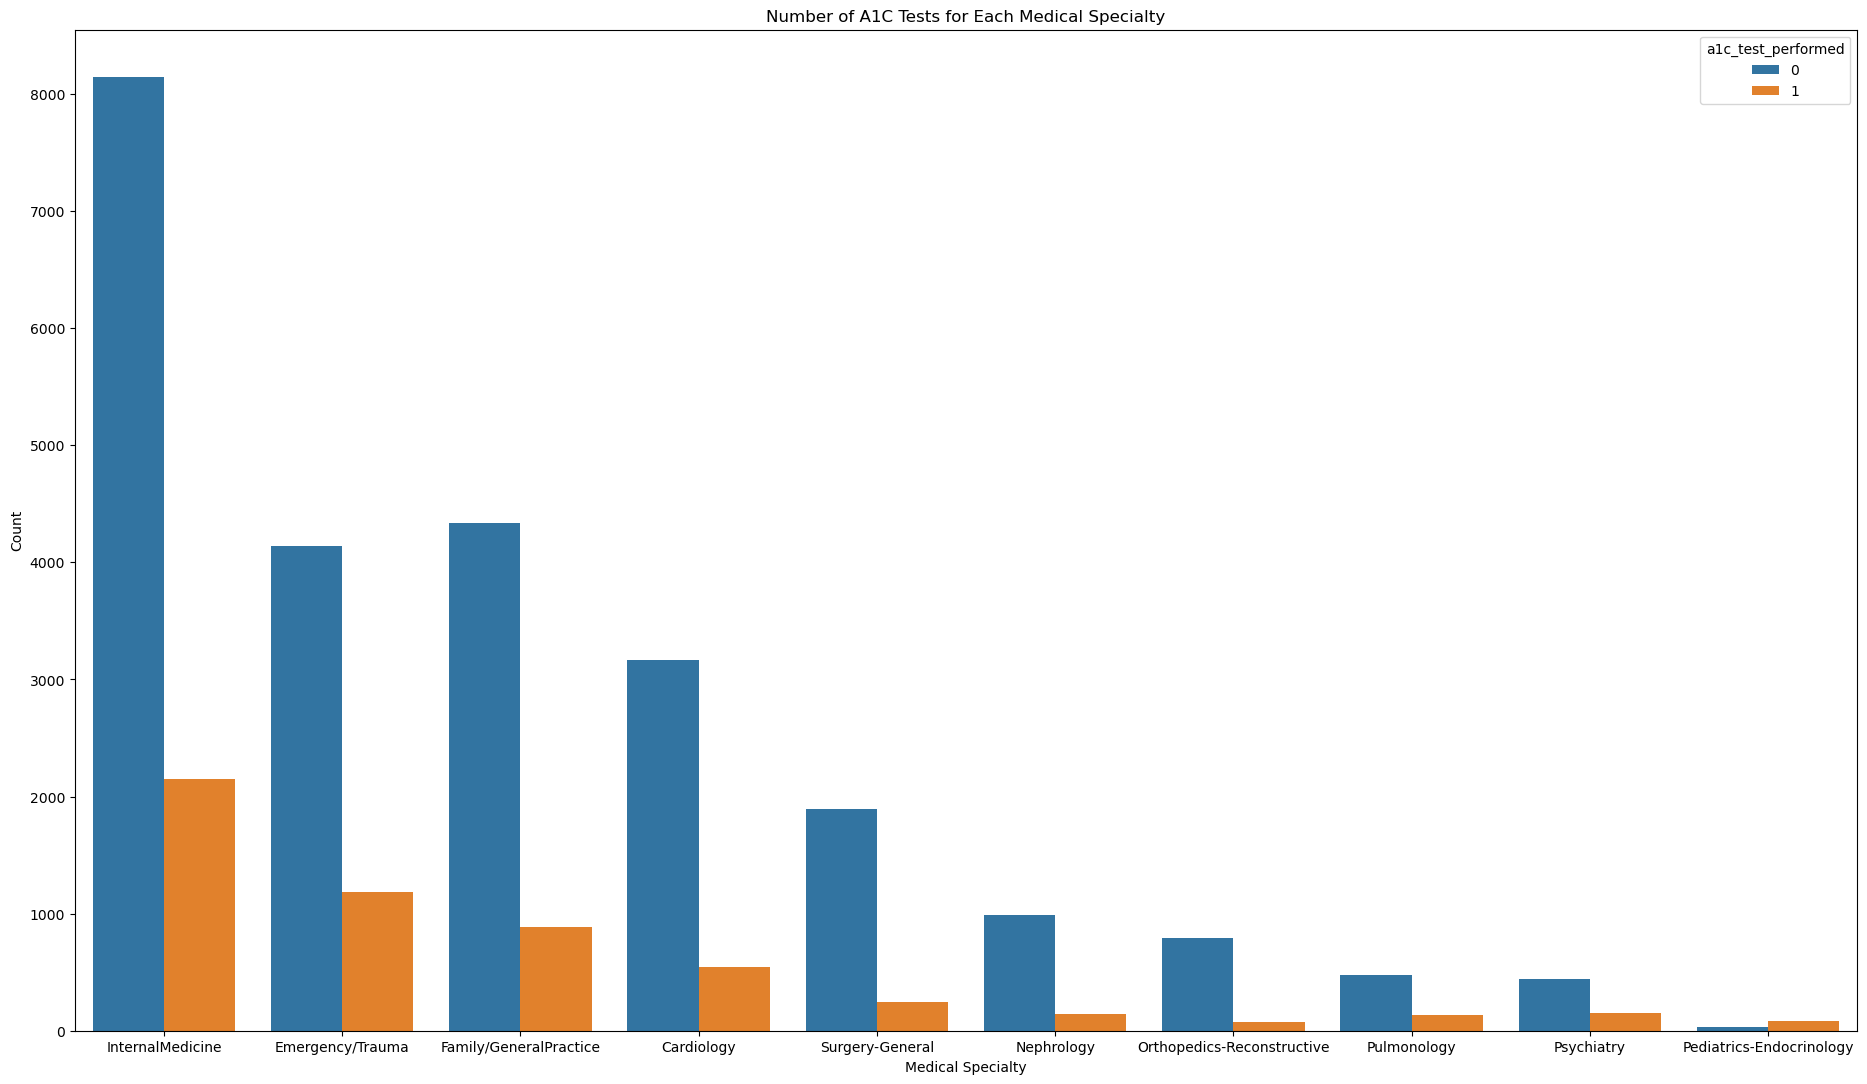

In [215]:
plt.figure(figsize=(23, 13))

top_medical_specialty = data_train.groupby('medical_specialty')['a1c_test_performed'].value_counts().unstack().sort_values(by = 1, ascending = False).head(10).index

data_filtered = data_train[data_train['medical_specialty'].isin(top_medical_specialty)]

order = (data_filtered.groupby('medical_specialty')['a1c_test_performed']
    .value_counts().unstack().sum(axis=1).sort_values(ascending=False).index)

sns.countplot(x='medical_specialty', hue='a1c_test_performed', data=data_filtered, order = order)

plt.xlabel('Medical Specialty')
plt.ylabel('Count')
plt.title('Number of A1C Tests for Each Medical Specialty')

plt.show()

### Change in medication

In [220]:
data_train['change_in_meds_during_hospitalization'].value_counts()

No    38326
Ch    32910
Name: change_in_meds_during_hospitalization, dtype: int64

In [224]:
# If there was no change in medication then replace with value 0 if yes then 1
data_train['change_in_meds_during_hospitalization'] = data_train['change_in_meds_during_hospitalization'].replace({'Ch': 1, 'No': 0}).astype(int)
data_test['change_in_meds_during_hospitalization'] = data_test['change_in_meds_during_hospitalization'].replace({'Ch': 1, 'No': 0}).astype(int)

data_train['change_in_meds_during_hospitalization'].value_counts()

0    38326
1    32910
Name: change_in_meds_during_hospitalization, dtype: int64

In [228]:
data_train.groupby('readmitted_binary')['change_in_meds_during_hospitalization'].value_counts(normalize = True).unstack()

change_in_meds_during_hospitalization,0,1
readmitted_binary,,
0,0.541573,0.458427
1,0.509686,0.490314
